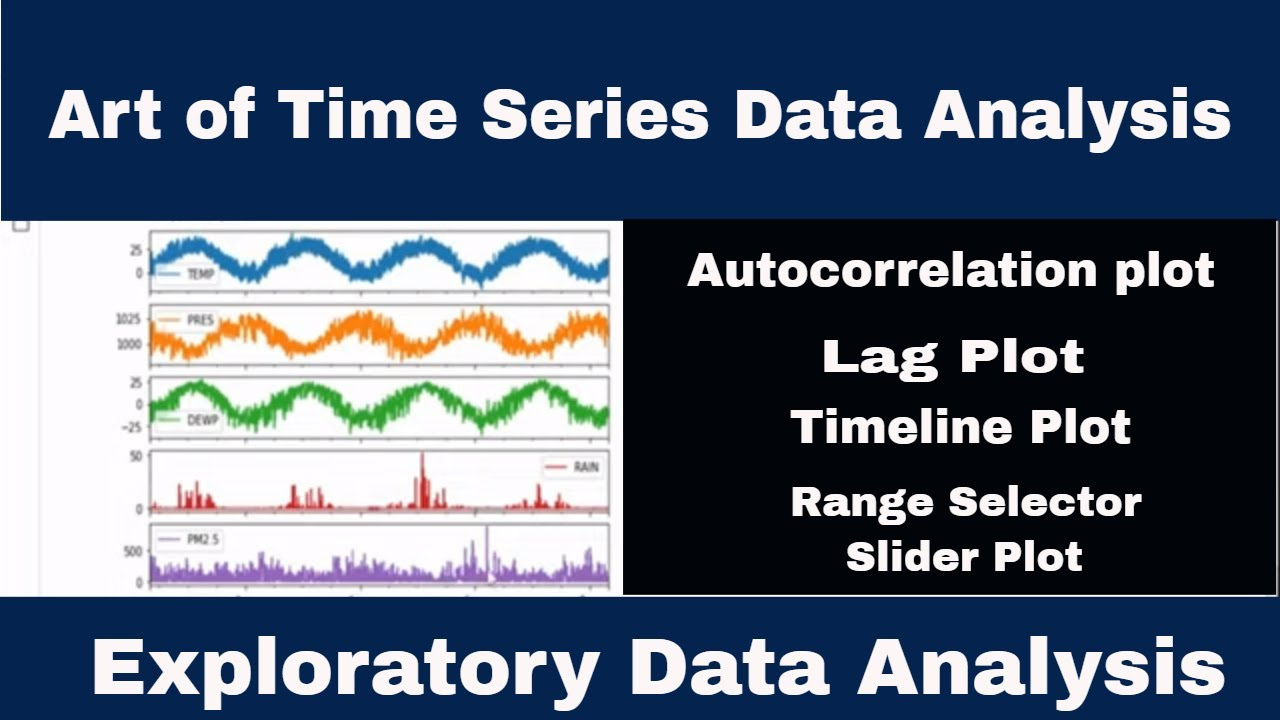

#### We are going to Analyse Time Series Data Using Pandas functions, Matplotlib Plots, Plotly's Interactive Plots. We are going to fetch live Stock Market Data Like Apple, Google, Tesla etc, Here we are using Indian tech giant TCS stock data.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px

#### Fetch past 2500 Days Stock Data.

In [154]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=2500)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

df = yf.download('TCS', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
df.head()

Open  High   Low  Close  Adj Close  Volume
Date                                                  
2016-02-24  5.25  5.25  5.05   5.12   4.786087  394500
2016-02-25  5.13  5.23  4.94   5.11   4.776739  305500
2016-02-26  5.12  5.44  5.08   5.27   4.926304  369900
2016-02-29  5.28  5.70  5.27   5.41   5.057174  446000
2016-03-01  5.41  5.58  5.32   5.41   5.057174  487500

### Understand The Data

#### Columns

In [78]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

#### Data types

In [80]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

#### Last Day of our Dataset

In [83]:
df.tail(1)

Open  High   Low  Close  Adj Close  Volume
Date                                                  
2022-12-28  4.17   4.3  4.13   4.15       4.15  239500

- So we have Upto Yesterday's Data.

#### Descriptive statistics

In [81]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  1725.000000  1725.000000  1725.000000  1725.000000  1725.000000   
mean      6.982557     7.174626     6.793171     6.977252     6.751225   
std       3.195321     3.290419     3.096587     3.190558     3.239533   
min       1.800000     2.050000     1.800000     1.990000     1.869565   
25%       4.670000     4.800000     4.550000     4.640000     4.412174   
50%       5.890000     6.040000     5.750000     5.880000     5.515218   
75%       8.650000     8.800000     8.430000     8.660000     8.300870   
max      19.150000    19.309999    17.780001    19.190001    19.190001   

             Volume  
count  1.725000e+03  
mean   4.621517e+05  
std    5.822626e+05  
min    4.710000e+04  
25%    1.920000e+05  
50%    3.020000e+05  
75%    5.156000e+05  
max    9.697500e+06

### Plot Every Column Seperately

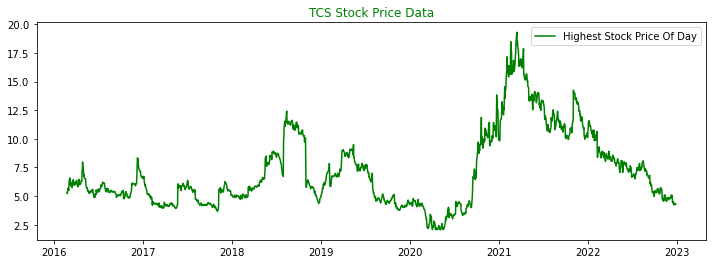

In [85]:
plt.figure(figsize=(12,4))
plt.plot(df['High'], label="Highest Stock Price Of Day", color='green')
plt.legend()
plt.title("TCS Stock Price Data", color='green');

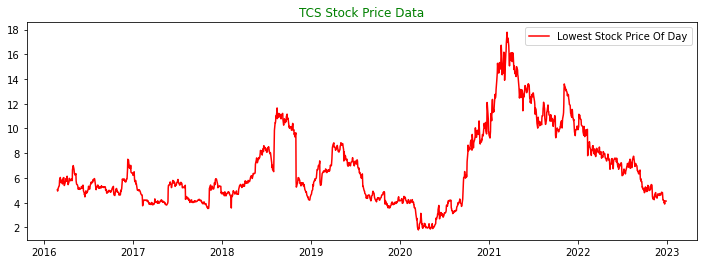

In [86]:
plt.figure(figsize=(12,4))
plt.plot(df['Low'], label="Lowest Stock Price Of Day", color='red')
plt.legend()
plt.title("TCS Stock Price Data", color='green');

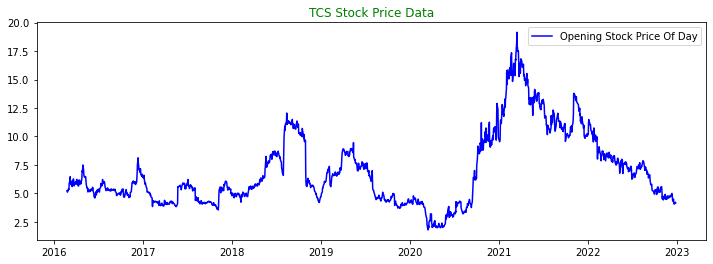

In [87]:
plt.figure(figsize=(12,4))
plt.plot(df['Open'], label="Opening Stock Price Of Day", color='blue')
plt.legend()
plt.title("TCS Stock Price Data", color='green');

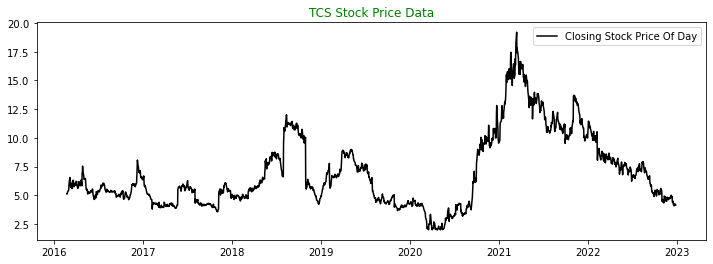

In [89]:
plt.figure(figsize=(12,4))
plt.plot(df['Close'], label="Closing Stock Price Of Day", color='black')
plt.legend()
plt.title("TCS Stock Price Data", color='green');

#### We can plot above using pandas with some inbuilt formating

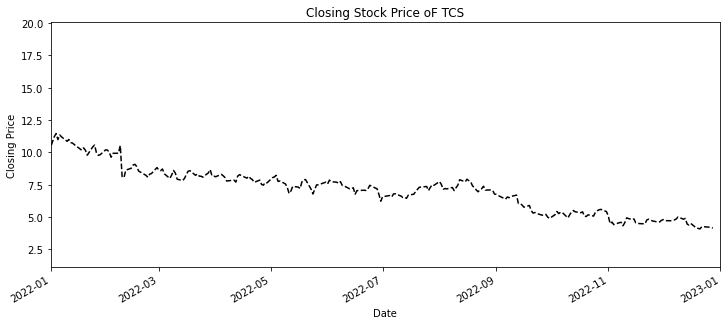

In [98]:
df['Close'].plot(xlim=['2022-01-01','2023-01-01'], figsize=(12,5), title='Closing Stock Price oF TCS', color='black',
                xlabel='Date', ylabel='Closing Price', style='--');

#### Plot Above using Plotly

In [99]:
data=df.reset_index()
data.head(2)

Date  Open  High   Low  Close  Adj Close  Volume
0 2016-02-24  5.25  5.25  5.05   5.12   4.786087  394500
1 2016-02-25  5.13  5.23  4.94   5.11   4.776739  305500

In [101]:
figure=px.bar(data_frame=data,
             x='Date',
             y='Close',
             title='TCS Stock Price')
figure.show()

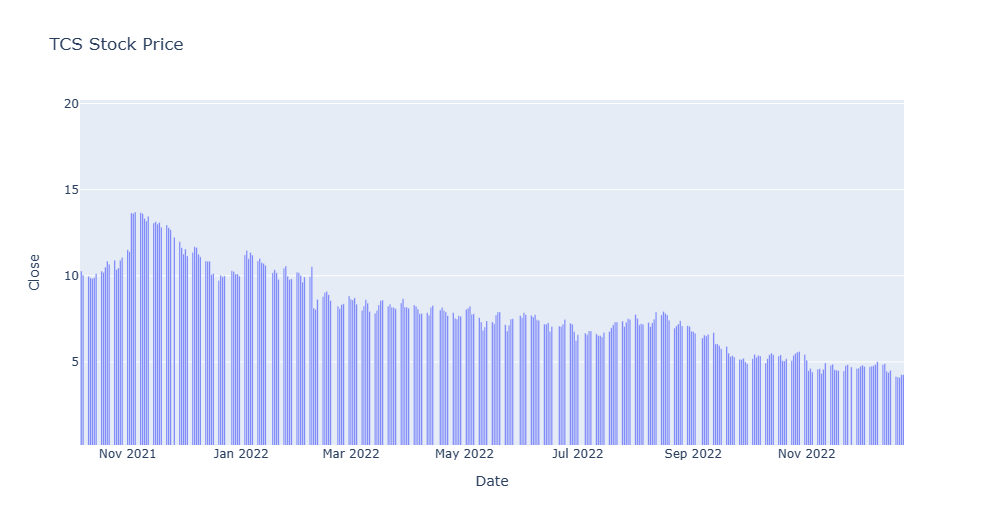

* You can ZOOM the portion which you wanted to see.

#### Plotly offers some Financial Stock prices which are inbuilt, Like Google, Apple, Facebook etc, You can use that name in "y".

In [106]:
df1 = px.data.stocks()
fig = px.line(df1, x='date', y="FB")
fig.show()

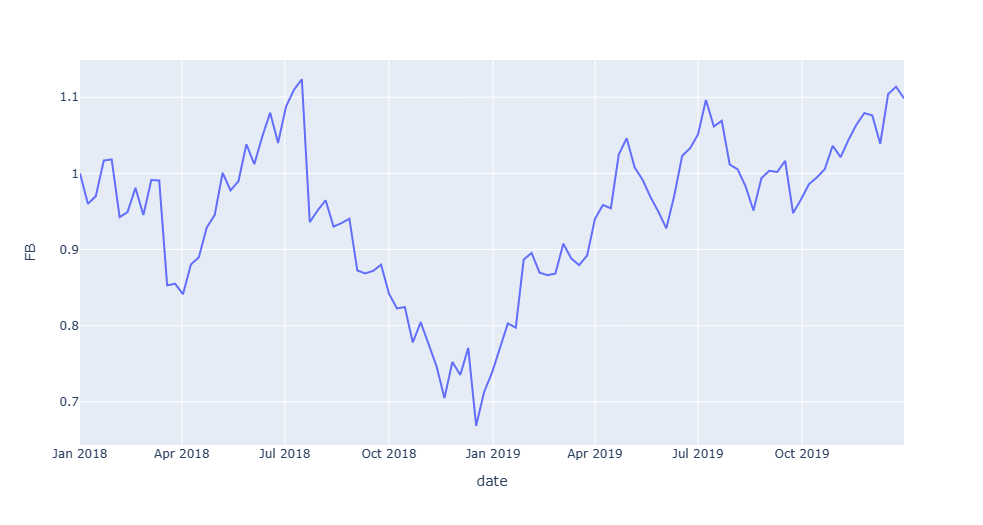

- ABOVE is the facebook stock price data.

## Plot Line plot using our TCS stock price data

In [111]:
figure=px.line(data_frame=data,
       x='Date',
       y='Close',
       title='TCS Stock Price')
figure.show()

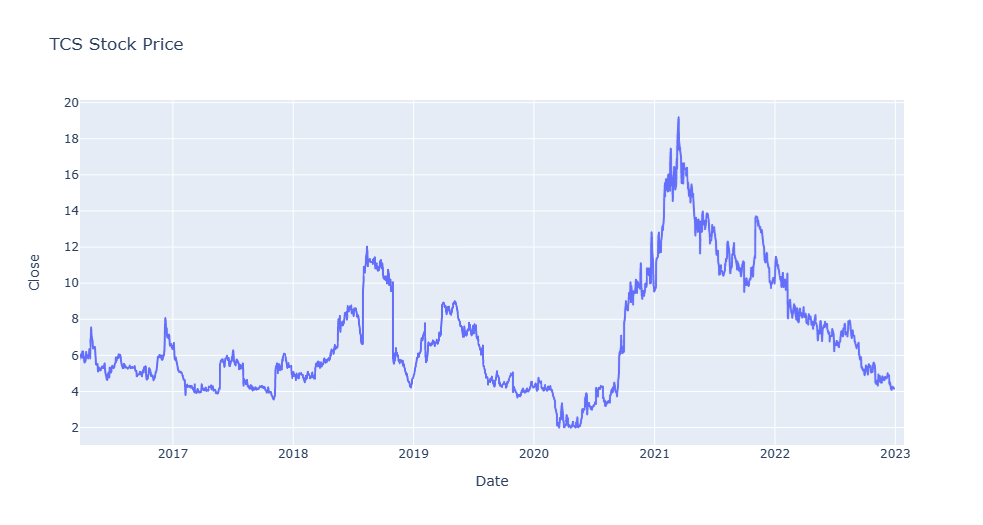

### Speciafy the Date Range
#### Here I used Range from 01-12-2021 to 01-01-2023

In [112]:
figure=px.line(data_frame=data,
       x='Date',
       y='Close',
       title='TCS Stock Price',
       range_x=['2021-12-01','2023-01-01'])
figure.show()

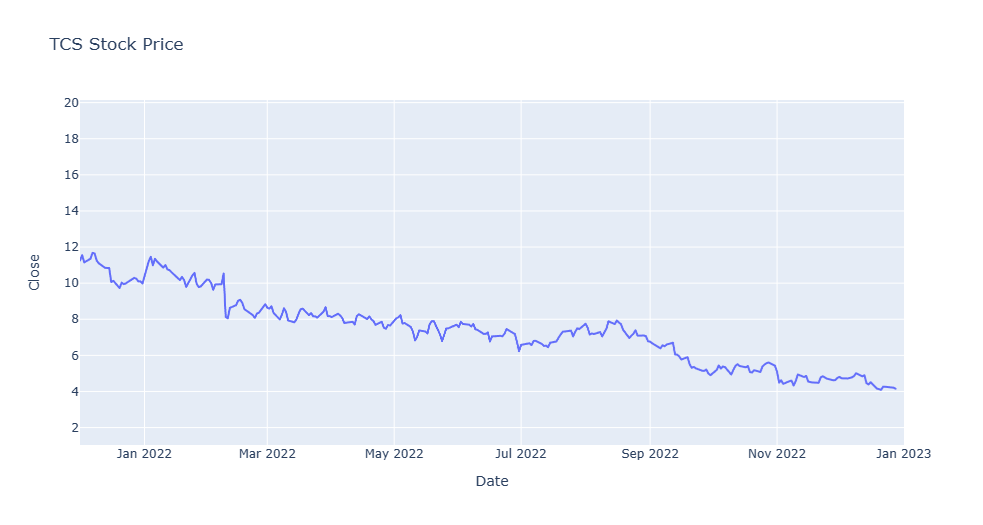

### Plot Sliding X-axis plot

In [113]:
figure=px.line(data_frame=data,
       x='Date',
       y='Close',
       title='TCS Stock Price')
figure.update_xaxes(rangeslider_visible=True)
figure.show()

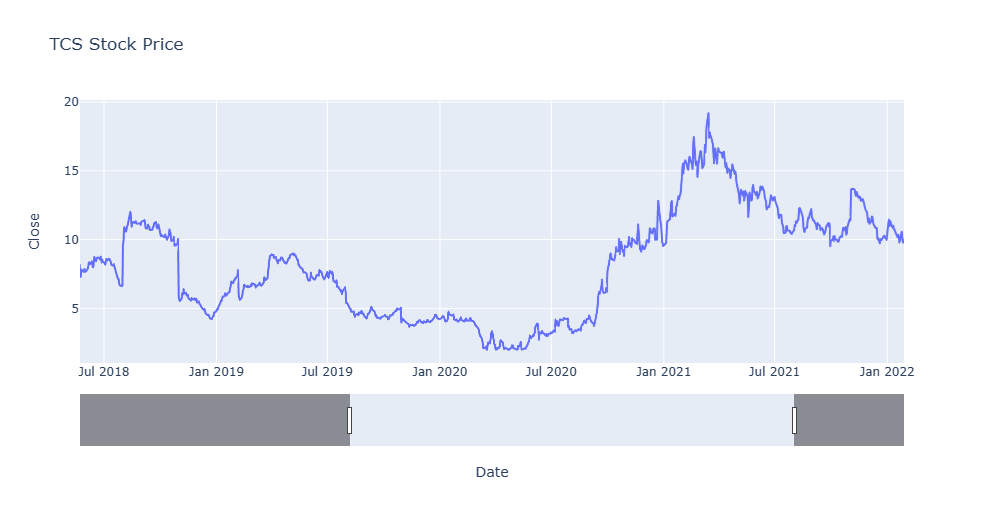

### Filter Buttons

In [116]:
figure = px.line(data_frame=data,
              x='Date',
              y='Close',
              title='TCS Stock Price')

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

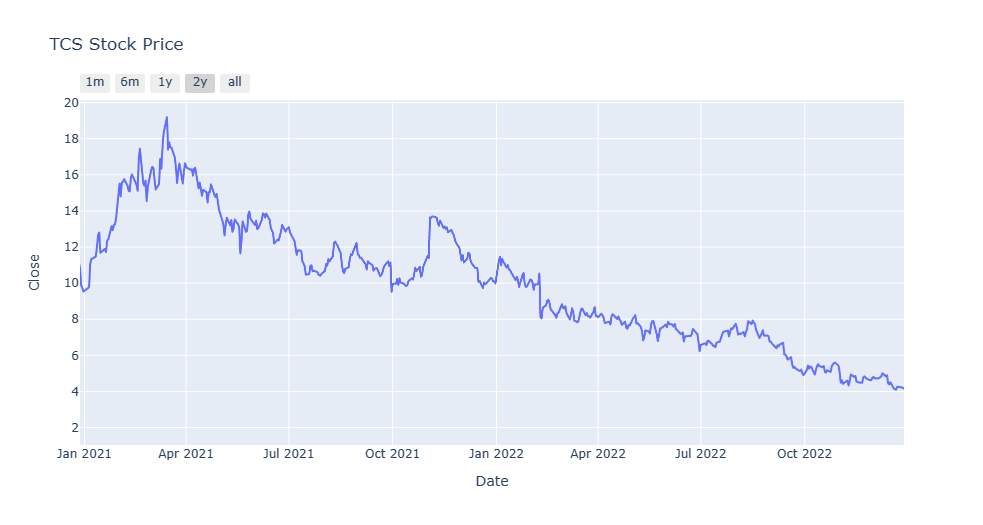

### X- Axis with Range Slider, Filter Buttons

In [115]:
figure = px.line(data_frame=data,
              x='Date',
              y='Close',
              title='TCS Stock Price')

figure.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

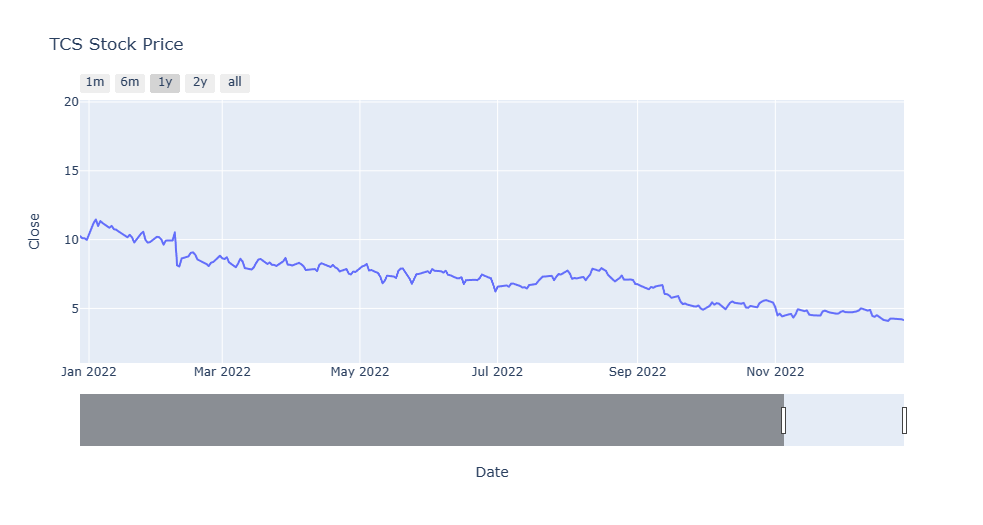

### Candlestick Charts (Exact graphical Representation of Stock Data)

In [146]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"],
                                        high=data["High"],
                                        low=data["Low"],
                                        close=data["Close"])])
figure.update_layout(title = "TCS Stock Price",
                     xaxis_rangeslider_visible=False)
figure.show()

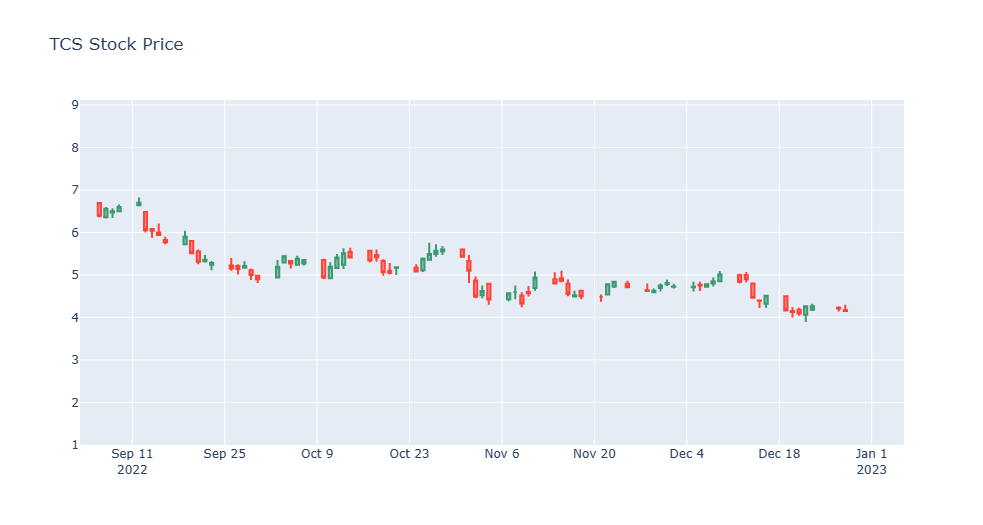

### Candlestick charts with RangeSlider

In [147]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"],
                                        high=data["High"],
                                        low=data["Low"],
                                        close=data["Close"])])
figure.update_layout(title = "TCS Stock Price")
figure.show()

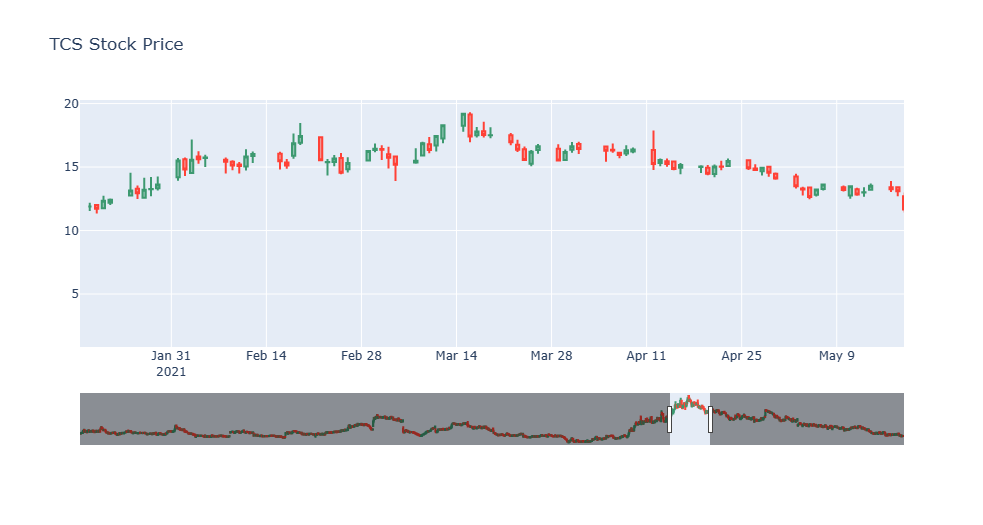

## Time Resample

In [55]:
# rule='A' means Index will have last date of that perticular year, & aggregation is minimum so Minimum value of that year has return
df.resample(rule='A').min()

Open   High    Low  Close  Adj Close  Volume
Date                                                     
2014-12-31  15.67  16.49  15.52  15.66  14.638696  139100
2015-12-31   7.13   7.83   7.12   7.17   6.702392   46900
2016-12-31   3.95   4.03   3.77   3.93   3.673696   58800
2017-12-31   3.55   3.69   3.53   3.56   3.327826   47100
2018-12-31   4.21   4.37   3.57   4.22   3.944782   50100
2019-12-31   3.70   3.76   3.57   3.66   3.421304   99000
2020-12-31   1.80   2.05   1.80   1.99   1.869565   73800
2021-12-31   9.54   9.83   9.23   9.52   9.520000  205100
2022-12-31   4.06   4.23   3.89   4.09   4.090000  112400

#### Use Rule="A" on "Close"

<AxesSubplot:xlabel='Date'>

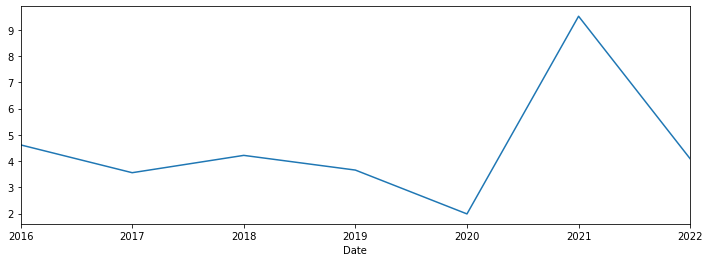

In [150]:
df.resample(rule='A').min()['Close'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

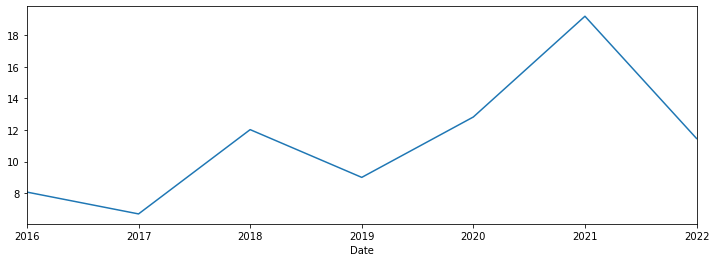

In [152]:
df.resample(rule='A').max()['Close'].plot(figsize=(12,4))

#### Rule="QS" devide perticular year quarterly

In [153]:
df.resample(rule='QS').min()

Open   High    Low  Close  Adj Close  Volume
Date                                                     
2016-01-01   5.12   5.23   4.94   5.11   4.776739  143700
2016-04-01   4.60   4.86   4.47   4.64   4.337391  116700
2016-07-01   4.81   4.89   4.76   4.84   4.524348   67900
2016-10-01   4.64   4.78   4.58   4.62   4.318696   58800
2017-01-01   3.85   3.94   3.75   3.80   3.552174   97700
2017-04-01   3.84   3.92   3.81   3.88   3.626957   57300
2017-07-01   4.06   4.17   4.02   4.06   3.795218   60500
2017-10-01   3.55   3.69   3.53   3.56   3.327826   47100
2018-01-01   4.23   4.71   3.57   4.51   4.215870   50300
2018-04-01   5.50   5.61   5.33   5.52   5.160000   50100
2018-07-01   6.59   6.72   6.51   6.62   6.188261   70400
2018-10-01   4.21   4.37   4.21   4.22   3.944782   69600
2019-01-01   4.72   5.08   4.69   4.93   4.608478   99000
2019-04-01   6.97   7.17   6.96   7.03   6.571522  125500
2019-07-01   4.23   4.27   4.07   4.25   3.972826  115800
2019-10-01   3.70   3.76   3.57   3.66   3.421304  114700
2020-01-01   1.80   2.19   1.80   2.00   1.869565   99000
2020-04-01   1.98   2.05   1.87   1.99   1.990000  133400
2020-07-01   3.21   3.31   3.12   3.20   3.200000   73800
2020-10-01   6.32   7.82   6.32   7.79   7.790000  447000
2021-01-01   9.54   9.83   9.23   9.72   9.720000  442700
2021-04-01  11.85  12.49  11.43  11.65  11.650000  256500
2021-07-01  10.16  10.57   9.48   9.52   9.520000  261700
2021-10-01   9.57   9.94   9.25   9.73   9.730000  205100
2022-01-01   7.86   8.04   7.73   7.83   7.830000  291200
2022-04-01   6.62   6.65   6.19   6.23   6.230000  163000
2022-07-01   4.98   4.98   4.81   4.90   4.900000  157400
2022-10-01   4.06   4.23   3.89   4.09   4.090000  112400

<AxesSubplot:xlabel='Date'>

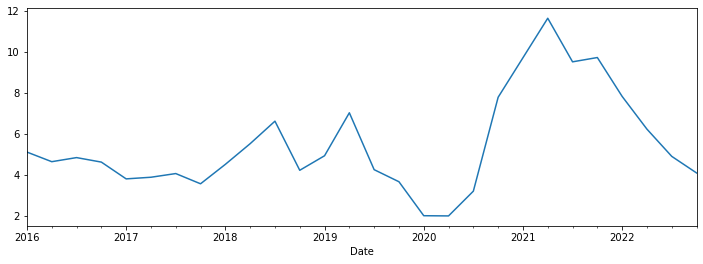

In [158]:
#quaterly 
df.resample(rule='QS').min()['Close'].plot(figsize=(12,4))

#### Rule="BA" Business End frequency

In [156]:
df.resample(rule='BA').min()

Open  High   Low  Close  Adj Close  Volume
Date                                                  
2016-12-30  4.60  4.78  4.47   4.62   4.318696   58800
2017-12-29  3.55  3.69  3.53   3.56   3.327826   47100
2018-12-31  4.21  4.37  3.57   4.22   3.944782   50100
2019-12-31  3.70  3.76  3.57   3.66   3.421304   99000
2020-12-31  1.80  2.05  1.80   1.99   1.869565   73800
2021-12-31  9.54  9.83  9.23   9.52   9.520000  205100
2022-12-30  4.06  4.23  3.89   4.09   4.090000  112400

<AxesSubplot:xlabel='Date'>

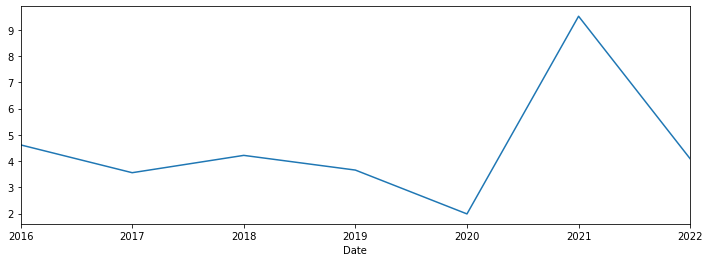

In [159]:
df.resample(rule='BA').min()['Close'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

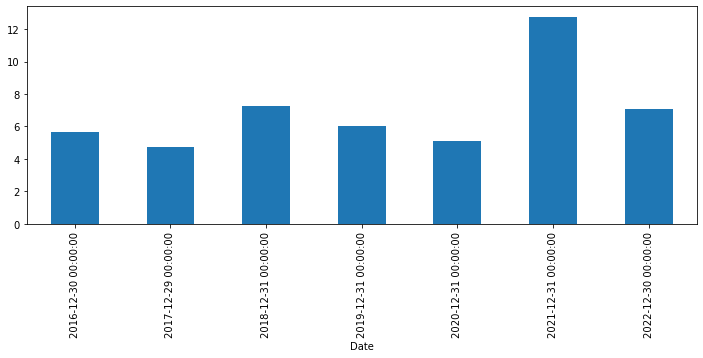

In [160]:
df['Close'].resample(rule='BA').mean().plot(kind='bar', figsize=(12,4))

#### Rule="M" Monthly

In [161]:
#monthly
df.resample(rule='M').min()

Open  High   Low  Close  Adj Close  Volume
Date                                                  
2016-02-29  5.12  5.23  4.94   5.11   4.776739  305500
2016-03-31  5.33  5.49  5.32   5.41   5.057174  143700
2016-04-30  5.65  5.81  5.46   5.60   5.234783  116700
2016-05-31  5.13  5.23  5.08   5.11   4.776739  178100
2016-06-30  4.60  4.86  4.47   4.64   4.337391  163100
...          ...   ...   ...    ...        ...     ...
2022-08-31  7.01  7.13  6.73   6.78   6.780000  157400
2022-09-30  4.98  4.98  4.81   4.90   4.900000  162700
2022-10-31  4.92  5.19  4.90   4.94   4.940000  243600
2022-11-30  4.43  4.54  4.24   4.33   4.330000  112400
2022-12-31  4.06  4.23  3.89   4.09   4.090000  225000

[83 rows x 6 columns]

<AxesSubplot:xlabel='Date'>

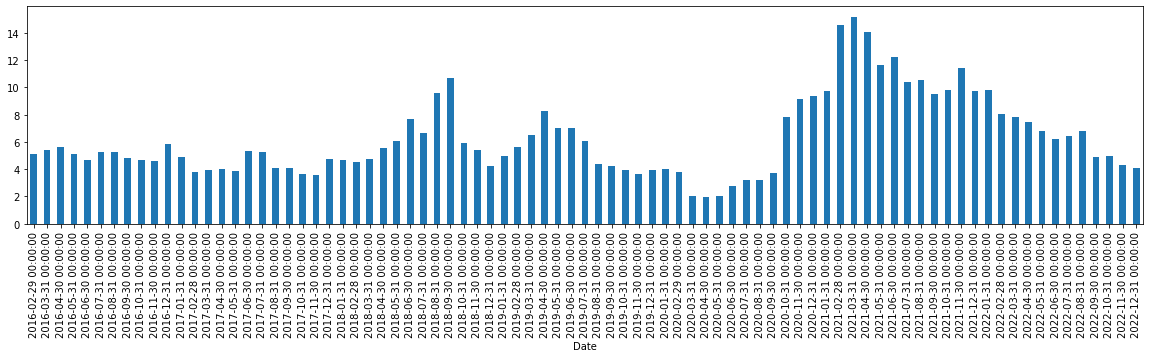

In [162]:
df['Close'].resample(rule='M').min().plot(kind='bar', figsize=(20,4))

### Rolling Mean

In [163]:
df['open_10']=df['Close'].rolling(10).mean()
df['open_10']

Date
2016-02-24      NaN
2016-02-25      NaN
2016-02-26      NaN
2016-02-29      NaN
2016-03-01      NaN
              ...  
2022-12-21    4.534
2022-12-22    4.475
2022-12-23    4.400
2022-12-27    4.337
2022-12-28    4.262
Name: open_10, Length: 1725, dtype: float64

In [165]:
df.head(20)

Open  High   Low  Close  Adj Close   Volume  open_10
Date                                                            
2016-02-24  5.25  5.25  5.05   5.12   4.786087   394500      NaN
2016-02-25  5.13  5.23  4.94   5.11   4.776739   305500      NaN
2016-02-26  5.12  5.44  5.08   5.27   4.926304   369900      NaN
2016-02-29  5.28  5.70  5.27   5.41   5.057174   446000      NaN
2016-03-01  5.41  5.58  5.32   5.41   5.057174   487500      NaN
2016-03-02  5.33  5.49  5.33   5.45   5.094565   345000      NaN
2016-03-03  5.42  6.04  5.42   5.89   5.505869  1248200      NaN
2016-03-04  5.92  6.36  5.82   6.12   5.720870   522300      NaN
2016-03-07  6.06  6.58  6.04   6.55   6.122827   346200      NaN
2016-03-08  6.47  6.59  5.85   5.87   5.487174   382200    5.620
2016-03-09  5.89  6.05  5.81   5.86   5.477826   150800    5.694
2016-03-10  5.88  5.90  5.62   5.71   5.337609   196600    5.754
2016-03-11  5.78  6.14  5.75   6.07   5.674131   187900    5.834
2016-03-14  6.07  6.14  5.83   6.01   5.618044   143700    5.894
2016-03-15  6.00  6.03  5.57   5.59   5.225435   163700    5.912
2016-03-16  5.60  5.74  5.52   5.59   5.225435   183300    5.926
2016-03-17  5.69  6.13  5.62   5.98   5.590000   320800    5.935
2016-03-18  6.08  6.32  5.97   6.28   5.870435   348200    5.951
2016-03-21  6.27  6.43  6.03   6.31   5.898479   297300    5.927
2016-03-22  6.27  6.34  6.00   6.03   5.636739   169800    5.943

<AxesSubplot:xlabel='Date'>

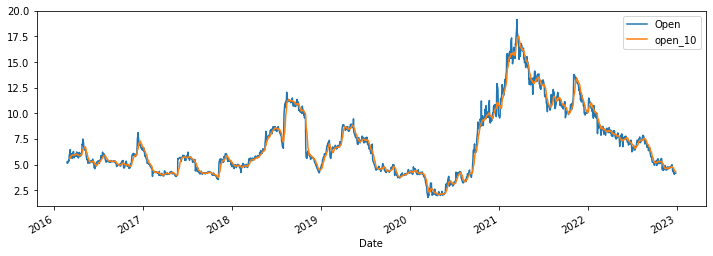

In [166]:
df[['Open','open_10']].plot(figsize=(12,4))

### Auto Correlation Plot

This Plot is helpful deciding p,d,q values.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

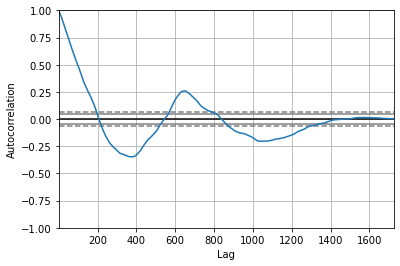

In [170]:
pd.plotting.autocorrelation_plot(df['Close'])